# NLP Experiment 2 - Tensorflow
Experiment with Tensorflow basic operations 
follow along [FreeCodeCamp's Course](https://www.youtube.com/watch?v=tPYj3fFJGjk)

## Module 1 - Introduction

### Install TF
for local environment, we need to run


```
!pip install --upgrade tensorflow
```

for colab 
```
%tensorflow_version 2.x
```


In [18]:
#@title Select environment
environment = "collab" #@param ["collab", "local"]



In [19]:
if environment == 'collab':
  %tensorflow_version 2.x
elif environment == 'local':
  !pip install --upgrade tensorflow 
  

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Now we import tensorflow as tf and check version

In [20]:
import tensorflow as tf 
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.8/dist-packages/tensorflow/_api/v2/version/__init__.py'>


### Create Tensors 
create three tensors of three datatypes 
* string 
* number 
* float 

In [21]:
str_tensor = tf.Variable("string tensor", tf.string)
num_tensor = tf.Variable(42, tf.int16)
float_tensor = tf.Variable(3.14159, tf.float64)

### Rank/Degree
check rank/degree of tensors

In [22]:
rank1_tensor = tf.Variable(["The", "quick", "brown", "fox"], tf.string)
rank2_tensor = tf.Variable([["this", "is", "a", "sentence"],["the", "other", "sentence", "follows"]], tf.string)

let us check its ranks

In [23]:
ranks_vec = []
ranks_vec.append(tf.rank(str_tensor))
ranks_vec.append(tf.rank(rank1_tensor))
ranks_vec.append(tf.rank(rank2_tensor))

# print 
ranks_vec

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>]

check shapes

In [25]:
tensor1 = tf.ones([1,2,3])
print(tensor1)
tensor2 = tf.reshape(tensor1, [2,3,1])
tensor3 = tf.reshape(tensor2, [3, -1])

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)


In [26]:
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


### Toy example

In [34]:
t = tf.zeros([5,5,5,5])
print(t)
t = tf.reshape(t, [25, -1])
print(t)

tf.Tensor(
[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0.

## Module 3 - Learning Algo
* [ ] Linear Regression 
* [ ] Classification 
* [ ] Clustering 
* [ ] HMM


### Linear Regression

(0.0, 6.0, 0.0, 20.0)

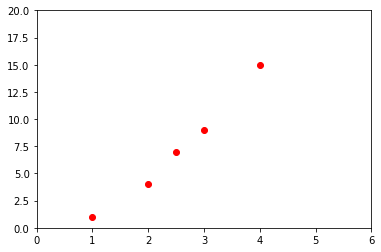

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]

plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

Install sklearn

In [36]:
!pip install -q sklearn

In [37]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc 


Load dataset 

In [41]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
print(dftrain.head())
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(dftrain.head())

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0     

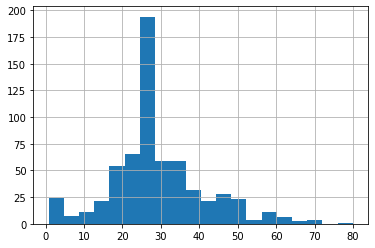

In [44]:
dftrain.age.hist(bins=20)